# Mice Gut Data Analyisis

In [1]:
import pandas as pd
import re
import os
import sys
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from mice_inspection_utils import *
from linear_regression.regression import *

imput_subj_paths = [f"Data/raw/total.full.rn.RA.total_OTU_table.mouse{i+1}.ovr0.0p.csv" for i in range(0, 8)]
output_subj_paths = [f"Data/by_mouse/mouse_{i+1}.csv" for i in range(0, 8)]
metadata_path = "Data/raw/OTU_table.csv"
mi = Mice_Inspection(ip = imput_subj_paths, op = output_subj_paths, mdp = metadata_path)

In [2]:
df = pd.read_csv("Data/by_species/mean:250_sorted.csv")
df.rename(columns={"Unnamed: 0": "rank"}, inplace=True)
print(df.columns)
# Format for latex table "$rank$ & $species$  & $global mean$ //"
with open("Data/by_species/mean:100_sorted_latex.txt", "w") as f:
    for i in range(0, 100):
        rank = df["rank"][i] +1
        species = df["species"][i]
        mean = df["global_mean"][i]
        median = df["global_median"][i]
        f.write(f"${rank}$ & {species} & ${mean:.2f}$ & ${median:.2f}$ \\\\" + "\n")

Index(['rank', 'species', 'global_mean', 'global_median'], dtype='object')


In [3]:
species_list = mi.sort_species(sorting_criterion='mean', write_csv=False)
mi.plot_species(species_list= species_list, save_fig = True)

saved as Inspection_Outputs/1260_species_8_subjects_page_1.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_2.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_3.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_4.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_5.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_6.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_7.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_8.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_9.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_10.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_11.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_12.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_13.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_14.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_15.pdf
saved as Inspection_Outputs/1260_species_8_subjec

In [4]:
import PyPDF2 

# List of PDF file paths to merge
pdf_files = os.listdir("Inspection_Outputs/Time_Series/ALL_species_by_mean/")
# Create a PDF merger object
pdf_merger = PyPDF2.PdfMerger()

# Loop through all the PDF files and append them
for pdf in pdf_files:
    with open(pdf, 'rb') as file:
        pdf_merger.append(file)

# Write the merged PDF to a new file
with open('merged_file.pdf', 'wb') as output_file:
    pdf_merger.write(output_file)

print("PDFs merged successfully!")

ModuleNotFoundError: No module named 'PyPDF2'

## Fisher Method Networks

In [32]:
thresh = 1
bagg = 10
rk = 5

data = mi.interpolate_mice_df(max_rank= rk)

M_list = []
for subject in range(mi.subjects):
    species = data[subject].columns.to_list()
    data_array = data[subject].to_numpy()
    fisher = Fisher(input_data= data_array, threshold= thresh, bagging_iterations= bagg, verbose = False)
    M = fisher.LIMITS()
    M = M / np.max(np. abs(M))
    M_list.append(M)

data_array = [data[subject].to_numpy() for subject in range(len(data))]
fisher = Fisher(input_data= data_array, threshold= thresh, bagging_iterations= bagg, verbose = False)
M_all = fisher.LIMITS()
M_all = M_all / np.max(np. abs(M_all))

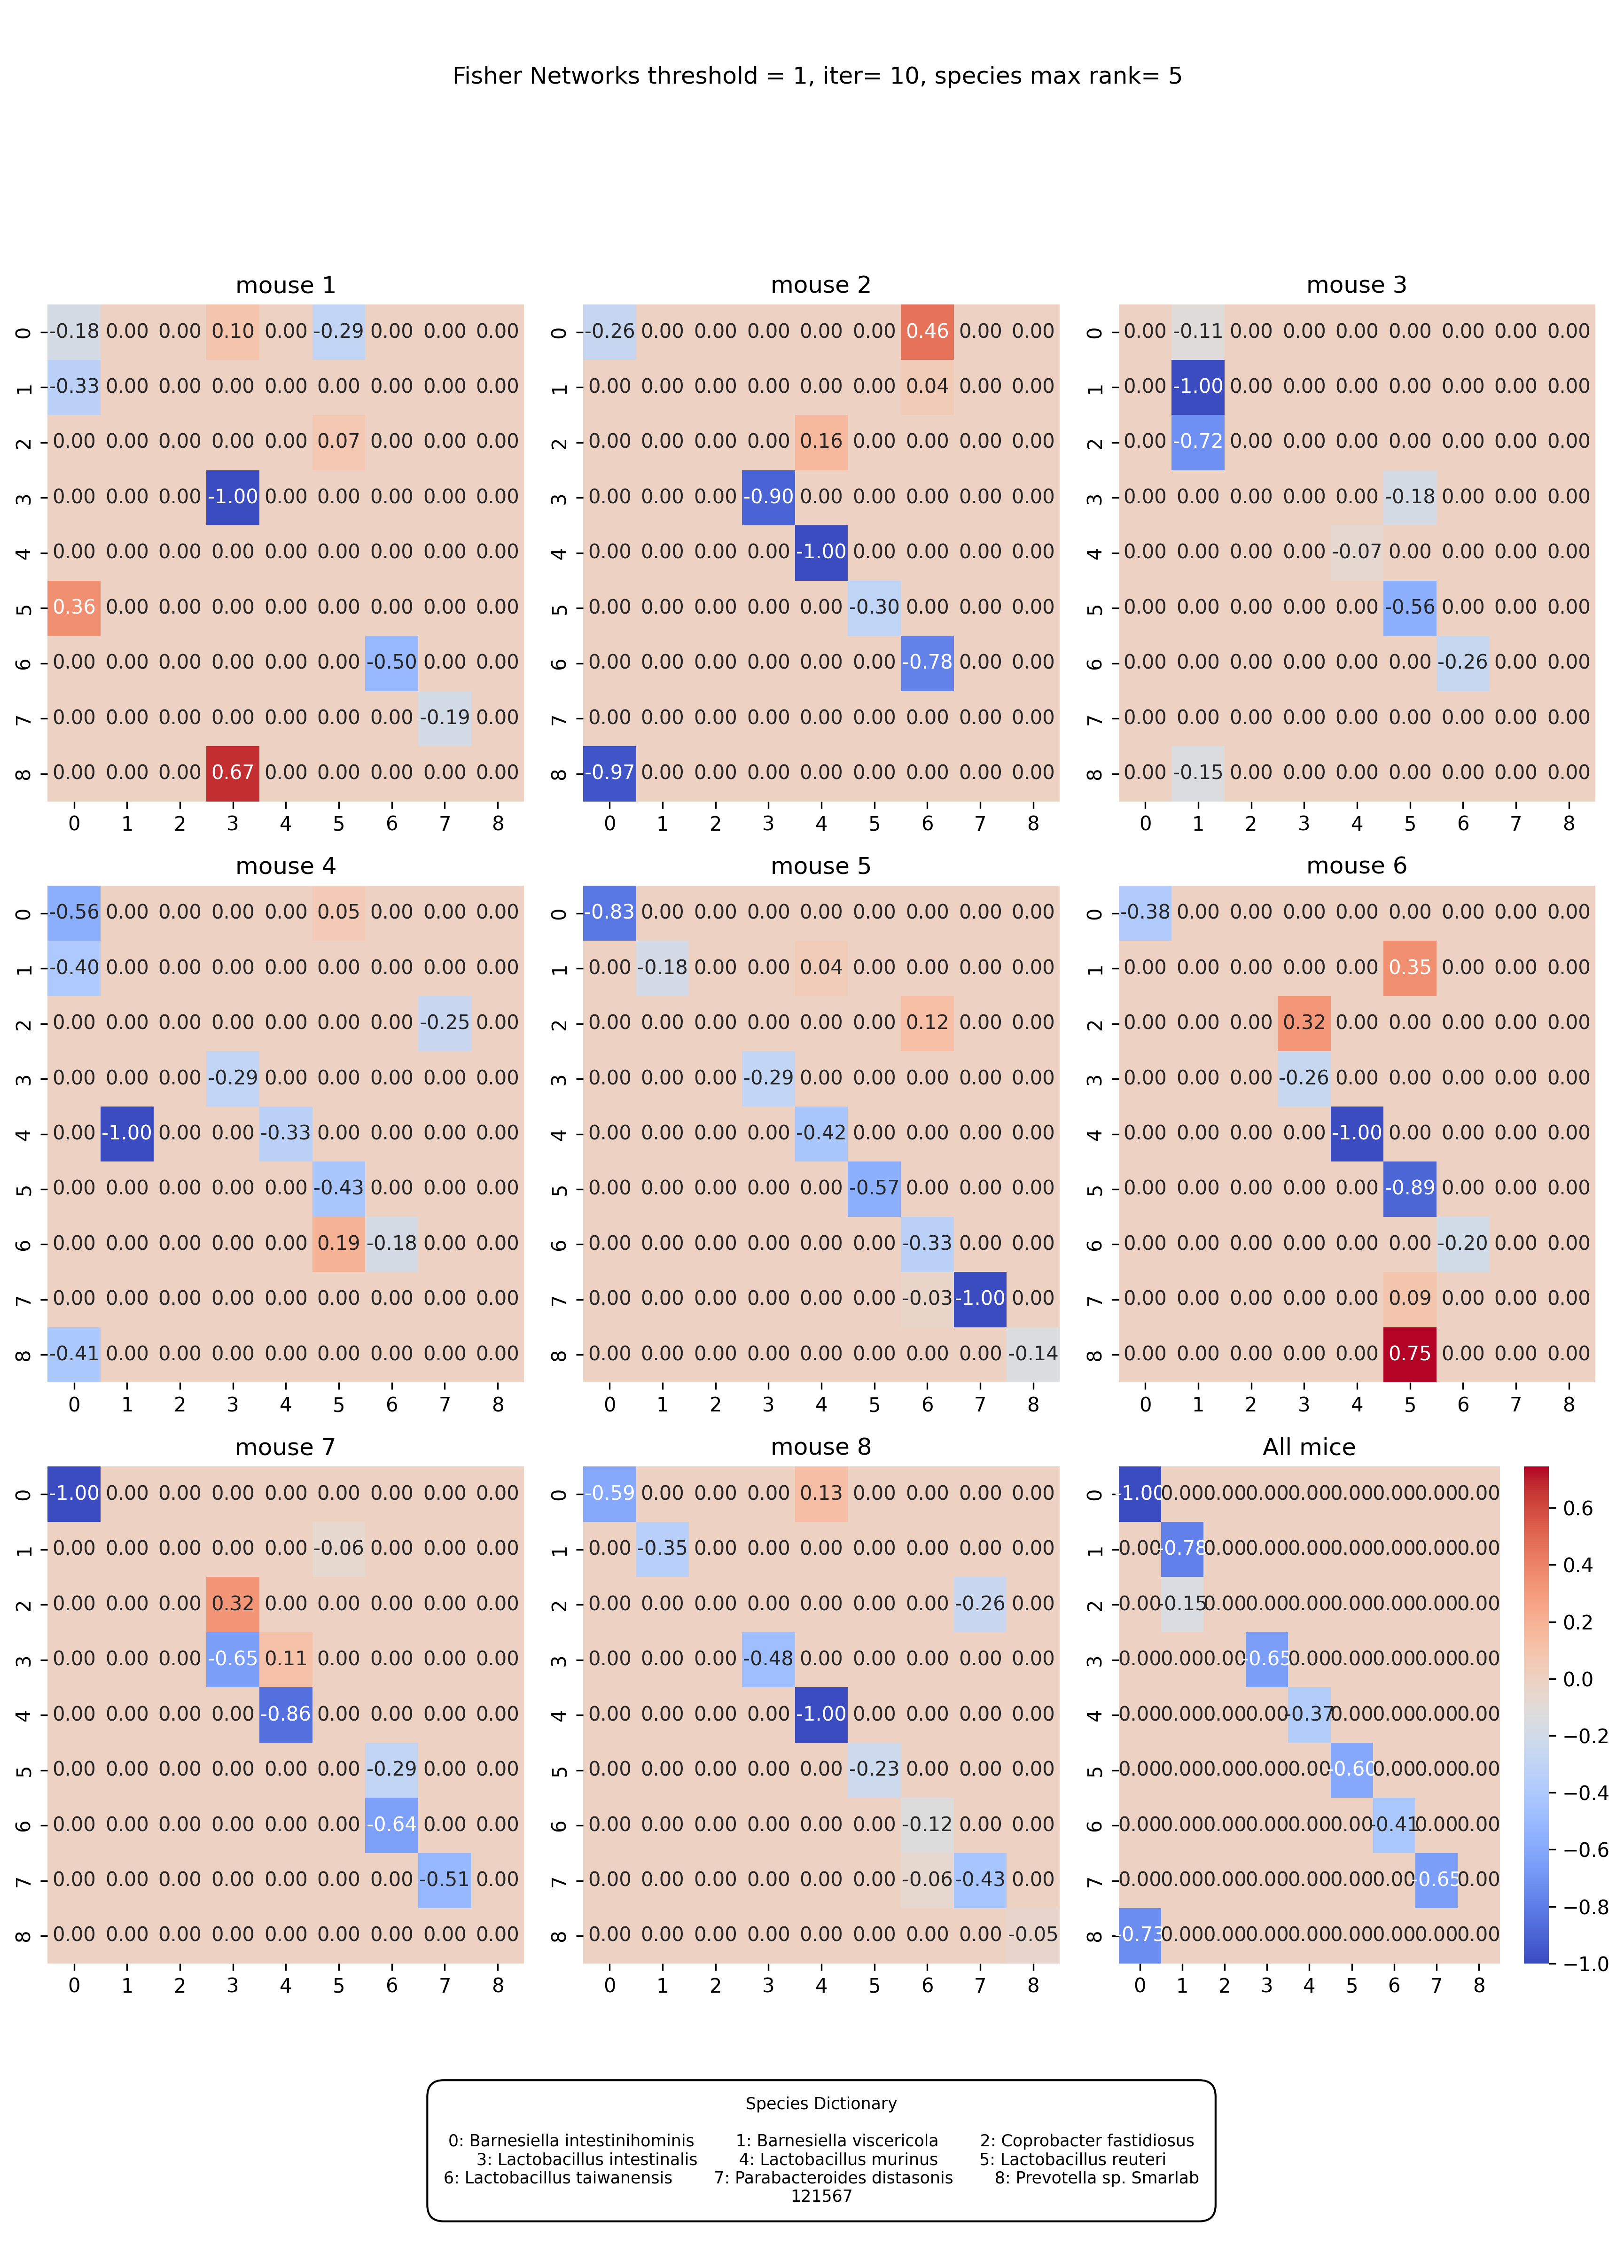

In [34]:
fig = plt.figure(figsize = (11.7, 16.5), dpi=300) # huge A3 output
gs = gridspec.GridSpec(nrows = 8, ncols= 3, figure=fig)

ax0 = fig.add_subplot(gs[0, :]) 
ax1 = fig.add_subplot(gs[1:3, 0])
ax2 = fig.add_subplot(gs[1:3, 1])
ax3 = fig.add_subplot(gs[1:3, 2])
ax4 = fig.add_subplot(gs[3:5, 0])
ax5 = fig.add_subplot(gs[3:5, 1])
ax6 = fig.add_subplot(gs[3:5, 2])
ax7 = fig.add_subplot(gs[5:7, 0])
ax8 = fig.add_subplot(gs[5:7, 1])
ax9 = fig.add_subplot(gs[5:7, 2])
ax10 = fig.add_subplot(gs[7, :]) 

# Determine the global vmin and vmax across all datasets
vmin = min(np.min(M) for M in M_list)
vmax = max(np.max(M) for M in M_list)

ax0.axis('off')

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for subject in range(mi.subjects):
    ax = axs[subject]
    species = data[subject].columns.to_list()
    M = M_list[subject]
    sns.heatmap(M, ax = ax, annot= True, cmap='coolwarm', vmin= vmin, vmax= vmax, cbar=False, fmt=".2f")
    ax.set_title(f"mouse {subject + 1}")

# All subjects together
sns.heatmap(M_all, ax = ax9, annot= True, cmap='coolwarm',vmin= vmin, vmax= vmax, cbar=True, fmt=".2f")
ax9.set_title(f"All mice")

# Add a custom text box to the subplot at index 8
# Dictionary to create the text box
species = data[subject].columns.to_list()
species_dict = {}
for i,s in enumerate(species):
    species_dict[i] = s

# Create the text for the custom text box
text_box = '        '.join([f'{key}: {value}' for key, value in species_dict.items()])
title = "Species Dictionary\n\n" 
wrapped_text = textwrap.fill(text_box, width=100)  # Adjust width for better wrapping
full_text = title + wrapped_text
# Add the text to the subplot
ax10.text(0.5, 0.5, full_text, fontsize='small', ha='center', va='center',
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

ax10.axis('off')
plt.suptitle(f'Fisher Networks threshold = {thresh} %, iter= {bagg}, species max rank= {rk}', y = 0.95)
# Adjust layout to prevent overlapping
plt.tight_layout()

output_directory = "Fisher Networks"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
output_path = os.path.join(output_directory, f'all_10.pdf')
plt.savefig(output_path)

In [9]:
sel_species_median = mi.select_species(max_rank= 20, by = 'median', sort='byrank')
sel_species_mean = mi.select_species(max_rank= 20, by = 'mean', sort='byrank')
sel_species_difference = set(sel_species_mean) - set(sel_species_median)
sel_species_difference = list(sel_species_difference)  # Convert back to list if needed
print(f"not in median: {sel_species_difference}")
sel_species_difference = set(sel_species_median) - set(sel_species_mean)
sel_species_difference = list(sel_species_difference)  # Convert back to list if needed
print(f"not in mean: {sel_species_difference}")

#mi.plot_species(species_list= sel_species[20:30], start_idx = 21, subjects= [(s + 1) for s in range(mi.subjects)], interpolate='none', save_fig= True)

not in median: ['Streptococcus AY020', 'Vibrio cholerae', '[Eubacterium] biforme', 'Candidatus Arthromitus sp. SFB-mouse', 'Streptococcus sp. B1']
not in mean: ['Prevotella sp. oral taxon 317', 'Candidatus Prevotella conceptionensis']


threshold rank= 20, mouse 1, cum frequency= 0.6742596006144393
threshold rank= 20, mouse 2, cum frequency= 0.7253932584269662
threshold rank= 20, mouse 3, cum frequency= 0.7337459546925567
threshold rank= 20, mouse 4, cum frequency= 0.7205577889447236
threshold rank= 20, mouse 5, cum frequency= 0.6971722222222222
threshold rank= 20, mouse 6, cum frequency= 0.6985389408099688
threshold rank= 20, mouse 7, cum frequency= 0.7239932998324959
threshold rank= 20, mouse 8, cum frequency= 0.6988115183246073


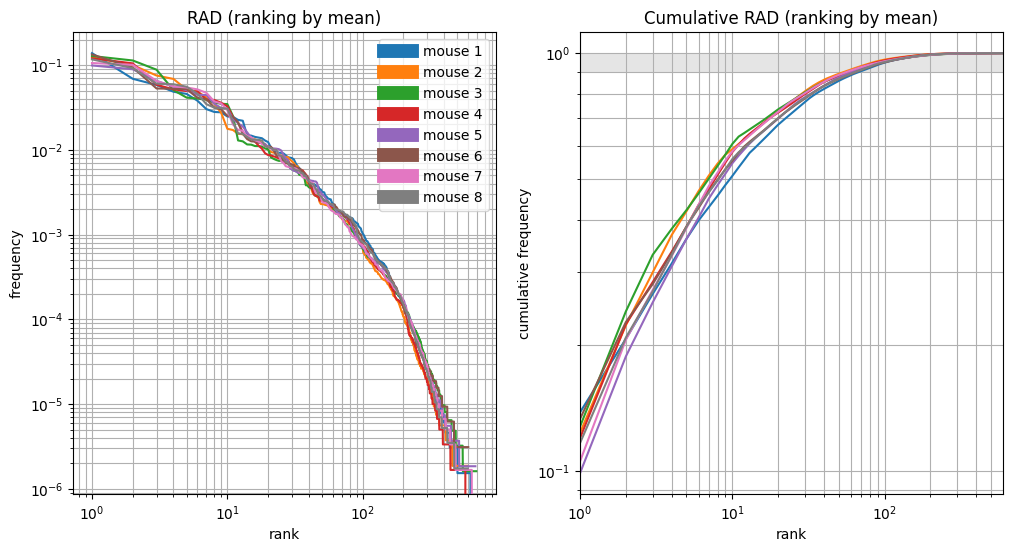

In [7]:
max_rank = 20
out_path = os.path.join("Outputs","Inspection", "RAD.pdf")
mi.mice_df = mi.get_mice_df(sort_by= 'mean')


fig, ax = plt.subplots( nrows=1, ncols= 2,  figsize = (12, 6))

for n in range(mi.subjects):
    df = mi.mice_df[n]
    x = np.arange(1, len(df)+1)
    y = df['mean_counts'] / mi.sample_size
    y_cum = [np.sum(y[0:(rank)]) for rank in x]
    threshold_cum = np.sum(y[0:(max_rank)])
    print(f"threshold rank= {max_rank}, mouse {n+1}, cum frequency= {threshold_cum}")
    ax[0].plot(x, y, label = f'mouse {n+1}')
    ax[1].plot(x, y_cum, label = f'mouse {n+1}')
    ax[1].set_xlim(1, len(df))
ax[0].set_title("RAD (ranking by mean)", fontsize = 'large')
ax[0].set_xlabel("rank")
ax[0].set_ylabel("frequency")
ax[0].grid(which= "both")
legend = ax[0].legend()
for line in legend.get_lines():
    line.set_linewidth(10)
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].set_title("Cumulative RAD (ranking by mean)", fontsize = 'large')
ax[1].set_xlabel("rank")
ax[1].set_ylabel("cumulative frequency")
ax[1].grid(which= "both")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].axhspan(0.9, 1, facecolor='gray', alpha=0.2)
plt.savefig(out_path)

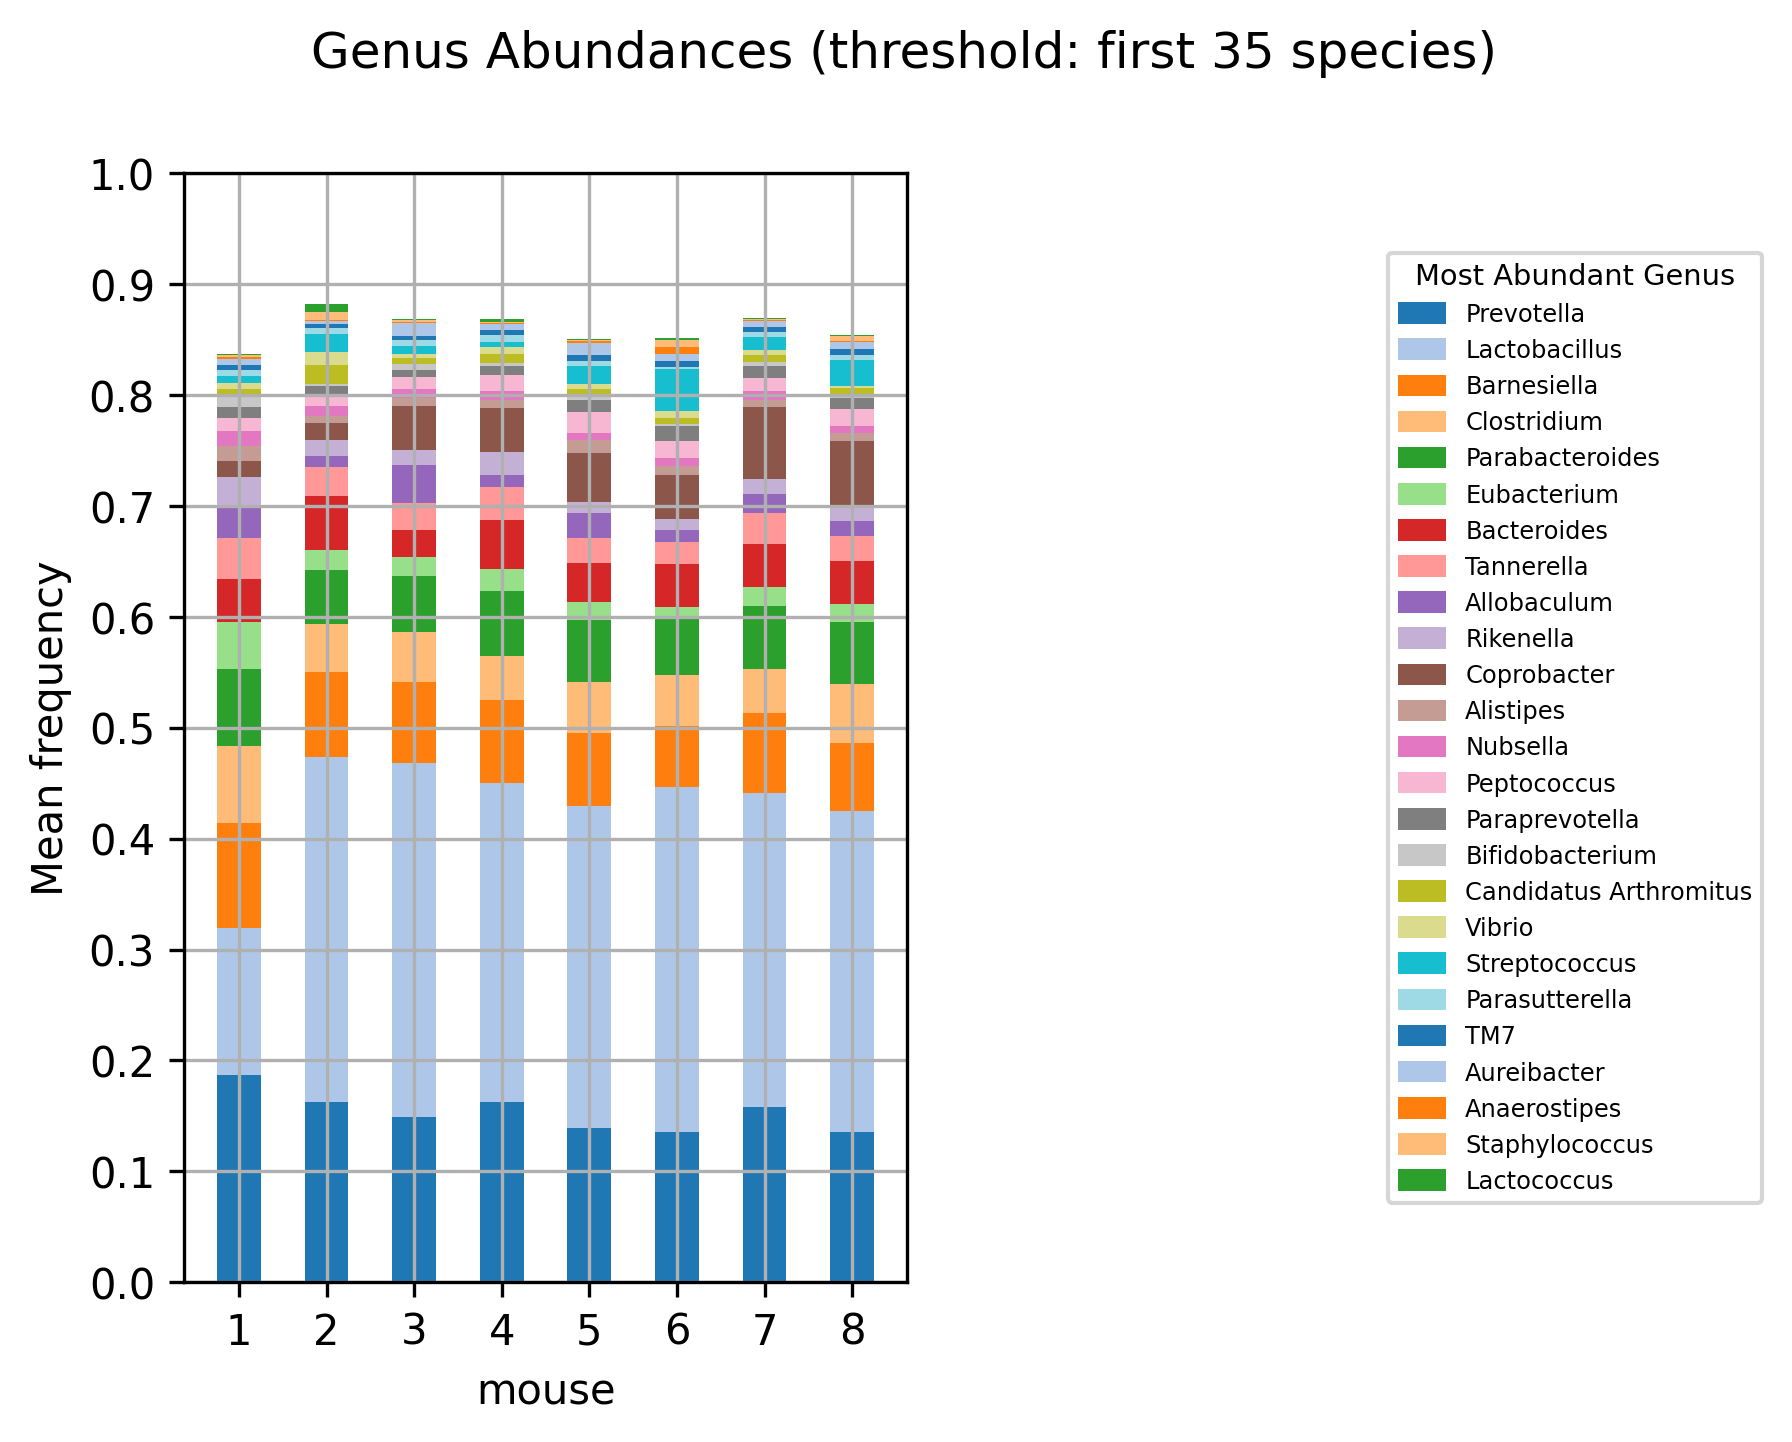

In [3]:
mi.make_stacked_bar_plot(max_rank= 35, category= 'Genus', by= 'mean')

# Cross sectional analysis

In [ ]:
%%capture
colors = plt.get_cmap('tab10')

for mouse in range(0, 8):
    fig, axs = plt.subplots(nrows= 7, ncols = 1, figsize = (20, 30))
    # first 5 most abundand species
    for i in range(0, 14):
        df = pd.read_csv(f"Data/mouse_{mouse + 1}.csv")
        time = df.columns[3:].to_numpy()
        counts = df.iloc[i, 3:].to_numpy()
        std = np.std(counts)
        mean = np.mean(counts)
        n = int(i / 2)
        axs[n].plot(time, counts, label = f"{df.iloc[i, 1]}", linewidth = 2, color = colors(i % 10))
        axs[n].scatter(time, counts, s= 10, color = colors(i % 10))
        axs[n].axhline(y= mean, color = colors(i % 10))
        axs[n].fill_between(x=time, y1=mean - std, y2=mean + std, color=colors(i % 10), alpha=0.5)
        axs[n].legend(title = f"species:",
                        loc= "upper right")
        axs[n].set_xlim(min(time), max(time))
        axs[n].set_xticks([t for i, t in enumerate(time) if i % 10 == 0])
        axs[n].grid()
    axs[0].set_title(f"Mouse {mouse+1}", fontsize = 20)
    plt.savefig(f"Output_Images/timeseries_mouse_{mouse+1}.pdf")

In [ ]:
rank = 9

df = pd.read_csv(f"Data/mouse_1.csv")
times = df.columns[3:].to_numpy(dtype=int)
counts = df.iloc[rank, 3:].to_numpy(dtype=int)
std = np.std(counts)
mean = np.mean(counts)


data = []
for lag in range(0, 90):
    sum = 0
    n = 0
    for i, time in enumerate(times):
        for j in range(i, len(times)):
            if times[j] == time + lag:
                n += 1
                sum += (counts[i] - mean) * (counts[j] - mean)
    pearson = sum /( n * (std ** 2))
    data.append({'lag': lag, 'pearson': pearson})

results = pd.DataFrame(data)
results.to_csv("Output_csv/prova_ACF.csv")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,8))
ax1.plot(times, counts, label = f"{df.iloc[rank, 1]}", linewidth = 2, color = colors(rank % 10))
ax1.scatter(times, counts, s= 10, color = colors(rank % 10))
ax1.axhline(y= mean, color = colors(rank % 10))
ax1.fill_between(x=times, y1=mean - std, y2=mean + std, color=colors(rank % 10), alpha=0.5)
ax1.legend(title = f"rank {rank + 1}, species:",
                loc= "upper right")
ax1.set_xlim(min(times), max(times))
ax1.set_xticks([t for i, t in enumerate(times) if i % 20 == 0])
ax1.grid()
ax2.bar(results['lag'], results['pearson'], color=colors(rank % 10))
ax2.set_title("ACF")

plt.savefig(f"Output_Images/ACF_mouse_1_species_{rank}.pdf")

# JUST A TEST:

the process is evidently NON stationary (see, for example, Eubacterium Biforme and Coprobacterium fastidiosus in mouse 1)
some timeseries exibit a stronger memory trend than others. When a series has memory, the ACF function decays slower or does not decay at all (see, for example, Rikenella Microfusus in mouse 1)

Anyway, I will base myself on the cutoff that can be infered from those series where the ACF indeed decays, and see what happens.

"""
measurements are made on average every 5 days. with
a cutoff of 20, i am discarding 75% of them
"""
N = 20
cutoff = 20
df = pd.read_csv(f"Data/mouse_1.csv")
times = df.columns[3:].to_numpy(dtype=int)
subset, indices = extract_subset(times, cutoff=cutoff)
indices = [i+3 for i in indices]
df = df.iloc[:N, indices]
# Create a heatmap
cov = row_pair_correlation(df)
plt.figure(figsize=(8, 6))
sns.heatmap(cov, annot=False, cmap='coolwarm', vmin = -1, vmax = +1, cbar=True)
plt.title(f'Heatmap of Correlation Matrix, first {N} species')
plt.show()

real_cov = cov[3, 4]
print(real_cov)

# Threshold determination by randomization of columns
N = 20
cutoff = 20
df = pd.read_csv(f"Data/mouse_1.csv")
times = df.columns[3:].to_numpy(dtype=int)
subset, indices = extract_subset(times, cutoff=cutoff)
indices = [i+3 for i in indices]
df = df.iloc[:N, indices]


shuffled_rows = []
for i, row in df.iterrows():
    shuffled_columns = np.random.permutation(df.columns)
    shuffled_row = row[shuffled_columns]
    shuffled_rows.append(shuffled_row)
df_shuffled = pd.DataFrame(shuffled_rows)

cov = row_pair_correlation(df_shuffled)

plt.figure(figsize=(8, 6))
sns.heatmap(cov, annot=False, vmin = -1, vmax = +1, cmap='coolwarm', cbar=True)
plt.title('Randomized columns correlation matrix')
plt.show()



I fear that shuffled covariances are not centered in zero, like they should

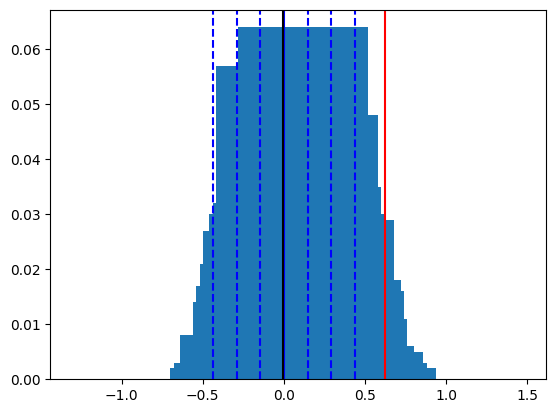

In [148]:
cutoff = 20

df = pd.read_csv(f"Data/mouse_1.csv")
times = df.columns[3:].to_numpy(dtype=int)
subset, indices = extract_subset(times, cutoff=cutoff)
indices = [i+3 for i in indices]
df = df.iloc[:100, indices]

a = df.iloc[9, :].to_numpy(dtype = int)
b = df.iloc[12, :].to_numpy(dtype = int)

values = []
real_pearson = np.corrcoef(a, b)[0,1]

trials = 1000
for n in range(0, trials):
    shuffled_a = np.random.permutation(a)
    shuffled_b = np.random.permutation(b)
    values.append(np.corrcoef(shuffled_a, shuffled_b)[0,1])

mean = np.mean(values)
median = np.median(values)
std = np.std(values)

nbins = 100
frequencies = np.zeros(nbins)
middle_points = [-0.9 + i * (2 / nbins) for i in range(0, nbins)]
for v in values:
    for i in range(0, nbins):
        if v > (-1 + i * (2 / nbins)) and v <= (-1 + (i + 1) * (2 / nbins)):
            frequencies[i] +=1
            break
frequencies = [f / trials for f in frequencies]


fig, ax = plt.subplots()

ax.axvline(real_pearson, color = "red")
ax.bar(middle_points, frequencies)
ax.axvline(mean, color = "blue")
ax.axvline(median, color = "black")
ax.axvline(mean + std, color = "blue", linestyle = "dashed")
ax.axvline(mean - std, color = "blue", linestyle = "dashed")
ax.axvline(mean + 2 * std, color = "blue", linestyle = "dashed")
ax.axvline(mean - 2 * std, color = "blue", linestyle = "dashed")
ax.axvline(mean + 3 * std, color = "blue", linestyle = "dashed")
ax.axvline(mean - 3 * std, color = "blue", linestyle = "dashed")

In [43]:
# Select days where measures are taken for ALL mice
days_list_of_lists = []
for n in range(0, len(selected_species)):
    df = species_df_list[n]
    df_no_nan = df.dropna().reset_index(drop=True)
    days_list = df_no_nan['day'].tolist()
    days_list_of_lists.append(days_list)

#check
for n in range(1, len(selected_species)):
    if set(days_list_of_lists[n-1]) != set(days_list_of_lists[n]):
        print(f"The lists {n-1} and {n} do not contain exactly the same elements (ignoring duplicates).")

days, i = extract_subset(days_list_of_lists[0], cutoff = 20)
print(days)

[8, 28, 49, 69, 90, 111, 133, 153, 175, 195, 216, 238, 259, 279, 303, 329, 352, 377, 398, 422, 457, 483, 503, 524]


In [85]:
def calculate_two_sided_pvalue_ecdf(samples, x):
    # Sort the samples
    sorted_samples = np.sort(samples)
    # Calculate the ECDF value at x
    n = len(sorted_samples)
    ecdf_value = np.searchsorted(sorted_samples, x, side='right') / n
    
    # Calculate the two-sided p-value
    if ecdf_value > 0.5:
        p_value = 2 * (1 - ecdf_value)
    else:
        p_value = 2 * ecdf_value
    
    return p_value

# Example usage:
samples = [1.2, 2.3, 2.1, 3.6, 2.8, 2.9, 3.2, 3.5, 2.6, 3.3]
x = 3.0
p_value = calculate_two_sided_pvalue_ecdf(samples, x)
print(f"The two-sided p-value for x = {x} is {p_value:.4f}")

The two-sided p-value for x = 3.0 is 0.8000


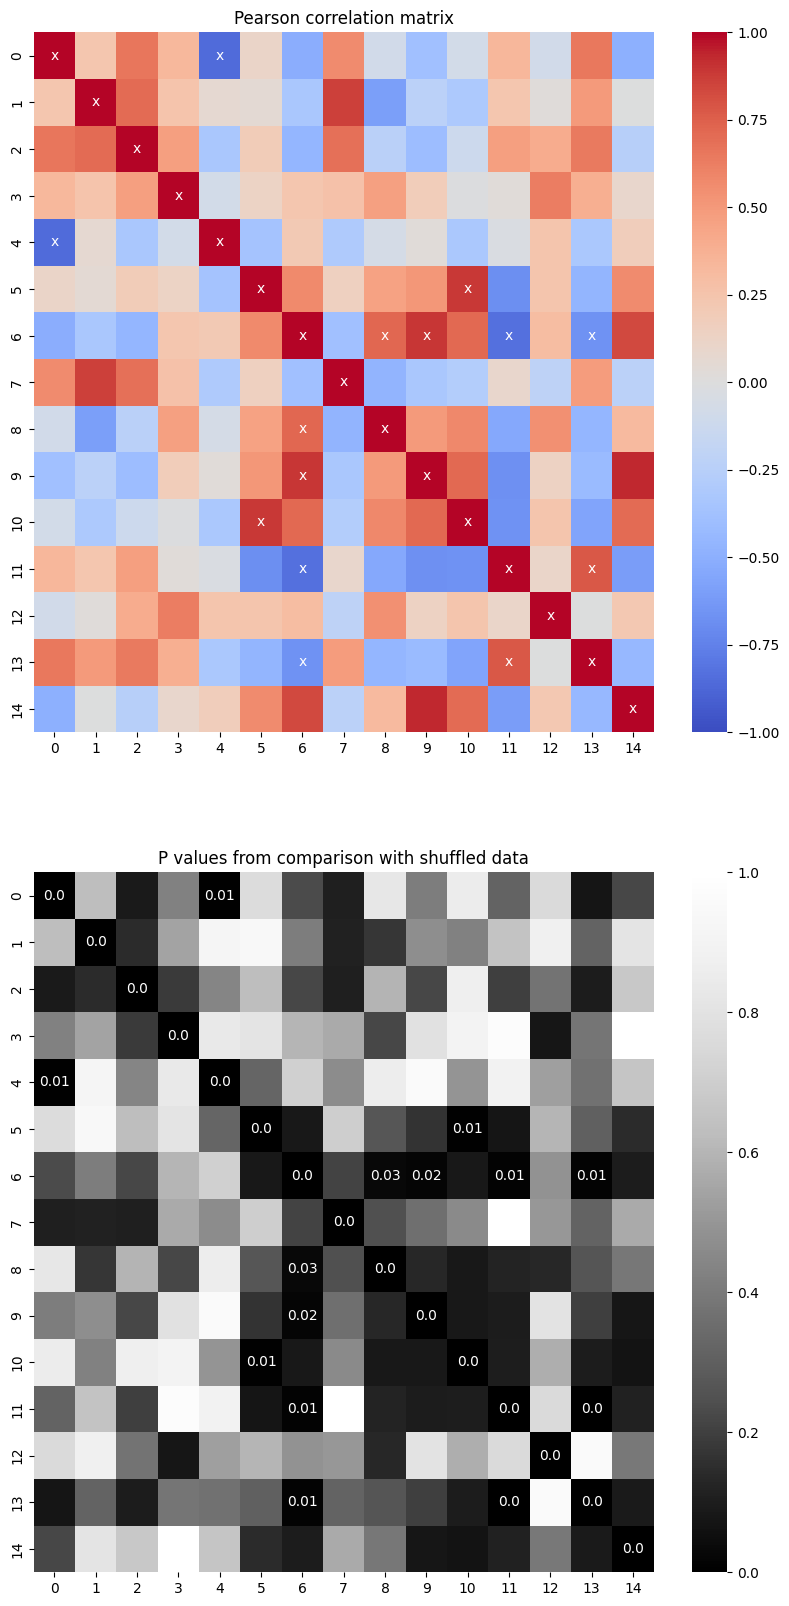

In [97]:
day = 133
"""
Construct cross-sectional abundance matrix
rows = species
columns = subjects
"""
abundance_data = []
for n, species in enumerate(selected_species):
    temp = species_df_list[n]
    temp = temp[temp['day'] == day]
    counts = temp.iloc[0, 3:11].to_numpy(dtype = int)
    abundance_data.append({'species': species, 
                           'mouse_1': counts[0],
                           'mouse_2': counts[1],
                           'mouse_3': counts[2],
                           'mouse_4': counts[3],
                           'mouse_5': counts[4],
                           'mouse_6': counts[5],
                           'mouse_7': counts[6],
                           'mouse_8': counts[7],
                           })
    
abundance_df = pd.DataFrame(abundance_data)
abundance_df.to_csv(f"Abundance_matrices/cross_sectional_day_{day}.csv")

cov = np.zeros((len(abundance_df), len(abundance_df)))
ntrials = 8 * 7 * 6
pvalues = np.zeros((len(abundance_df), len(abundance_df)))

for n, row in abundance_df.iterrows():
    for m in range(n, len(abundance_df)):
        x = row[1:].to_numpy(dtype=int)
        y = abundance_df.iloc[m, 1:].to_numpy(dtype=int)
        cov[n, m] = np.corrcoef(x, y)[0,1] #Pearson coefficient
        cov[m, n] = cov[n, m]
        # Null model
        samples = []
        for l in range(0, ntrials):
            shuffled_x = np.random.permutation(x)
            shuffled_y = np.random.permutation(y)
            samples.append(np.corrcoef(shuffled_x, shuffled_y)[0,1])
        pvalues[n,m] = calculate_two_sided_pvalue_ecdf(samples=samples, x=cov[n,m])
        pvalues[m,n] = pvalues[n, m]

            

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 20))
annot = np.where(pvalues < 0.05, "x", "")
sns.heatmap(cov, ax = ax1,annot=annot, vmin = -1, vmax = +1, cmap='coolwarm', cbar=True, fmt="")
ax1.set_title('Pearson correlation matrix')

annot = np.where(pvalues < 0.05, pvalues.round(2).astype(str), "")
sns.heatmap(pvalues, ax = ax2, annot=annot, vmin=0, vmax=1, cmap='Greys_r', cbar=True, fmt="")
ax2.set_title('P values from comparison with shuffled data')

plt.savefig("Output_Images/pvalues.pdf")

In [ ]:
trials = 1000
for n in range(0, trials):
    shuffled_a = np.random.permutation(a)
    shuffled_b = np.random.permutation(b)
    values.append(np.corrcoef(shuffled_a, shuffled_b)[0,1])

mean = np.mean(values)
median = np.median(values)
std = np.std(values)

nbins = 100
frequencies = np.zeros(nbins)
middle_points = [-0.9 + i * (2 / nbins) for i in range(0, nbins)]
for v in values:
    for i in range(0, nbins):
        if v > (-1 + i * (2 / nbins)) and v <= (-1 + (i + 1) * (2 / nbins)):
            frequencies[i] +=1
            break
frequencies = [f / trials for f in frequencies]

# Presence/Absence for Ising

In [16]:
mouse_paths = [os.path.join("Data", "by_mouse", f"mouse_{n}_transposed.csv") for n in range(1, 9)]

number_of_samples = []
for mouse in range(1, 9):
    df = pd.read_csv(mouse_paths[mouse - 1])
    if not df.empty:
        any_empty_rows_count = df.isnull().any(axis=1).sum()
        non_empty_rows = len(df) - any_empty_rows_count
        print(f"mouse {mouse}: {non_empty_rows}")

print(" ---------")
mouse_paths = [os.path.join("Data", "raw", f"total.full.rn.RA.total_OTU_table.mouse{n}.ovr0.0p.csv") for n in range(1, 9)]
number_of_samples = []
for mouse in range(1, 9):
    df = pd.read_csv(mouse_paths[mouse - 1])
    if not df.empty:
        print(f"mouse {mouse}: {len(df.columns) - 1}")

mouse 1: 217
mouse 2: 178
mouse 3: 206
mouse 4: 199
mouse 5: 180
mouse 6: 107
mouse 7: 199
mouse 8: 191
 ---------
mouse 1: 218
mouse 2: 179
mouse 3: 207
mouse 4: 200
mouse 5: 181
mouse 6: 107
mouse 7: 200
mouse 8: 192
